In [1]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model

In [2]:
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25,
            initState = [400/2,0])

In [3]:
game.reset()

(tensor([200.,   0.]), 0, False)

In [4]:
game.adversaryChoosePrice()

135.5

In [5]:
import torch
import torch.nn as nn
from torch.distributions import Categorical

# Hyperparameters
lr = .003
gamma = 1
num_episodes = 20

nn_ = 50

policy = nn.Sequential(nn.Linear(2, nn_), 
                       nn.ReLU(),
                       nn.Linear(nn_,nn_),
                       nn.ReLU(),
                       nn.Linear(nn_,15),                       
                       nn.Softmax(dim=0))


optim = torch.optim.Adam(policy.parameters(), lr=lr)

In [6]:
algorithm = ReinforceAlgorithm(game, policy, optim, 10, discountFactor =.99)

In [7]:
algorithm.solver()

tensor(164076.0938, grad_fn=<DivBackward0>)
tensor(197588.6094, grad_fn=<DivBackward0>)
tensor(202530.2031, grad_fn=<DivBackward0>)
tensor(126325.5938, grad_fn=<DivBackward0>)
tensor(119207.0859, grad_fn=<DivBackward0>)
tensor(112453.1250, grad_fn=<DivBackward0>)
tensor(106923.8047, grad_fn=<DivBackward0>)
tensor(97680.2500, grad_fn=<DivBackward0>)
tensor(82382.0391, grad_fn=<DivBackward0>)
tensor(61880.3164, grad_fn=<DivBackward0>)


In [8]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T

In [9]:
demandPotential

,0,1
0,200.000000,200.000000
1,209.500000,190.500000
2,209.750000,190.250000
3,209.875000,190.125000
4,209.937500,190.062500
5,209.968750,190.031250
6,209.984375,190.015625
7,209.992188,190.007812
8,209.996094,190.003906
9,209.998047,190.001953


<AxesSubplot:>

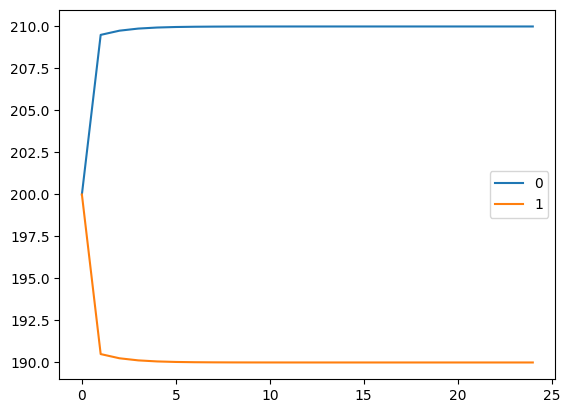

In [10]:
demandPotential.plot()

In [11]:
profits

,0,1
0,4968.250000,4160.250000
1,5805.062500,3570.062500
2,5824.140625,3555.140625
3,5833.691406,3547.691406
4,5838.469727,3543.969727
5,5840.859619,3542.109619
6,5842.054749,3541.179749
7,5842.652359,3540.714859
8,5842.951176,3540.482426
9,5843.100587,3540.366212


<AxesSubplot:>

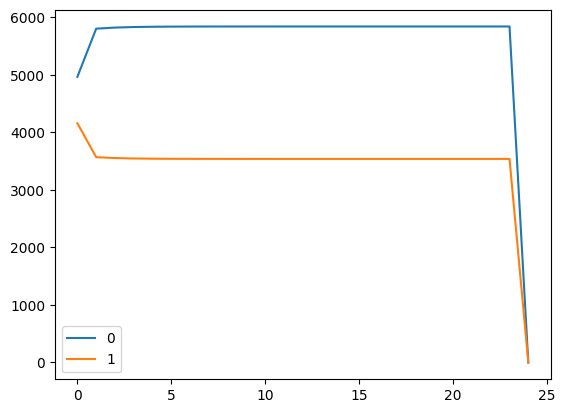

In [12]:
profits.plot()

In [13]:
prices

,0,1
0,116.500000,135.500000
1,130.250000,130.750000
2,130.375000,130.625000
3,130.437500,130.562500
4,130.468750,130.531250
5,130.484375,130.515625
6,130.492188,130.507812
7,130.496094,130.503906
8,130.498047,130.501953
9,130.499023,130.500977


<AxesSubplot:>

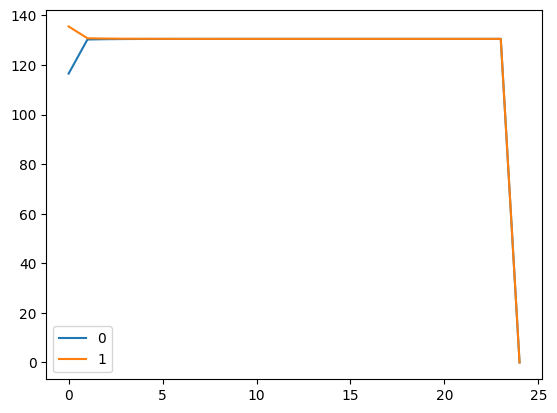

In [14]:
prices.plot()

In [15]:
learning = pd.DataFrame(algorithm.returns)
learning

,0
0,138741.333425
1,138741.333425
2,138741.333425
3,139286.583342
4,139286.583342
5,139286.583342
6,139286.583342
7,139286.583342
8,139286.583342
9,139286.583342


<AxesSubplot:>

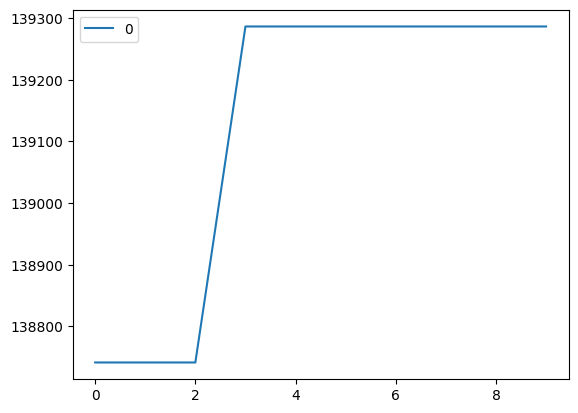

In [16]:
learning.plot()